# 패키지 임포트

In [1]:
import numpy
import pandas
import PyKomoran
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
%matplotlib inline
plt.rcParams['font.size'] = 20
plt.rcParams["figure.figsize"] = (50, 10)
plt.rcParams['lines.linewidth'] = 5
plt.rcParams["axes.grid"] = True

In [3]:
%%html
<style>
    table { display: inline-block }
    .rendered_html td, .rendered_html th { text-align: left; }
</style>

In [4]:
df = pandas.read_csv('Groceries_dataset.csv')
display(df)

,Member_number,Date,itemDescription
0,1000,15-03-2015,sausage
1,1000,15-03-2015,semi-finished bread
2,1000,15-03-2015,whole milk
3,1000,15-03-2015,yogurt
4,1000,24-06-2014,pastry
...,...,...,...
38760,5000,10-02-2015,root vegetables
38761,5000,10-02-2015,semi-finished bread
38762,5000,10-02-2015,soda
38763,5000,16-11-2014,bottled beer


In [5]:
komoran = PyKomoran.Komoran("EXP")
list_to_extract = [
    'NNG', # 일반명사NNG
    'NNP', # 고유명사NNP
    'NNB', # 의존명사NNB
    'VA', # 형용사VA
    'MM', # 관형사MM
    'SL', # 외국어SL
    'SH', # 한자SH
    'NF', # 명사추정범주NF
    # 'NA', # 분석불능범주NA
]
list_words = df['itemDescription'].tolist()
list_morpheme_analized = list()
loop_count = 0
for words in list_words:
    list_morpheme = komoran.get_morphes_by_tags(words, tag_list=list_to_extract)
    for word in list_morpheme:
        list_morpheme_analized.append({
            'index': loop_count,
            'word': str(word).upper(),
            'constants': 1,
        })
    loop_count += 1
df_dict = pandas.DataFrame(list_morpheme_analized)
display(df_dict)

,index,word,constants
0,0,SAUSAGE,1
1,1,SEMI,1
2,1,FINISHED,1
3,1,BREAD,1
4,2,WHOLE,1
...,...,...,...
64204,38762,SODA,1
64205,38763,BOTTLED,1
64206,38763,BEER,1
64207,38764,OTHER,1


In [6]:
df_transpose = pandas.pivot_table(df_dict, values='constants', index=['index'], columns=['word'], aggfunc=numpy.sum, fill_value=0)
df_transpose.columns = ['W-' + str(col) for col in df_transpose.columns.values]
display(df_transpose)

,W-ABRASIVE,W-ALCOHOL,W-APPETIZER,W-ARTICLES,W-ARTIF,W-BABY,W-BAGS,W-BAKERY,W-BAKING,W-BAR,...,W-VINEGAR,W-WAFFLES,W-WATER,W-WHIPPED,W-WHISKY,W-WHITE,W-WHOLE,W-WINE,W-YOGURT,W-ZWIEBACK
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,CNT
word,
VEGETABLES,3749
FRUIT,3255
MILK,3186
WHOLE,2502
OTHER,1898
...,...
TOILET,5
MAKE,5
BABY,3


<AxesSubplot:xlabel='word'>

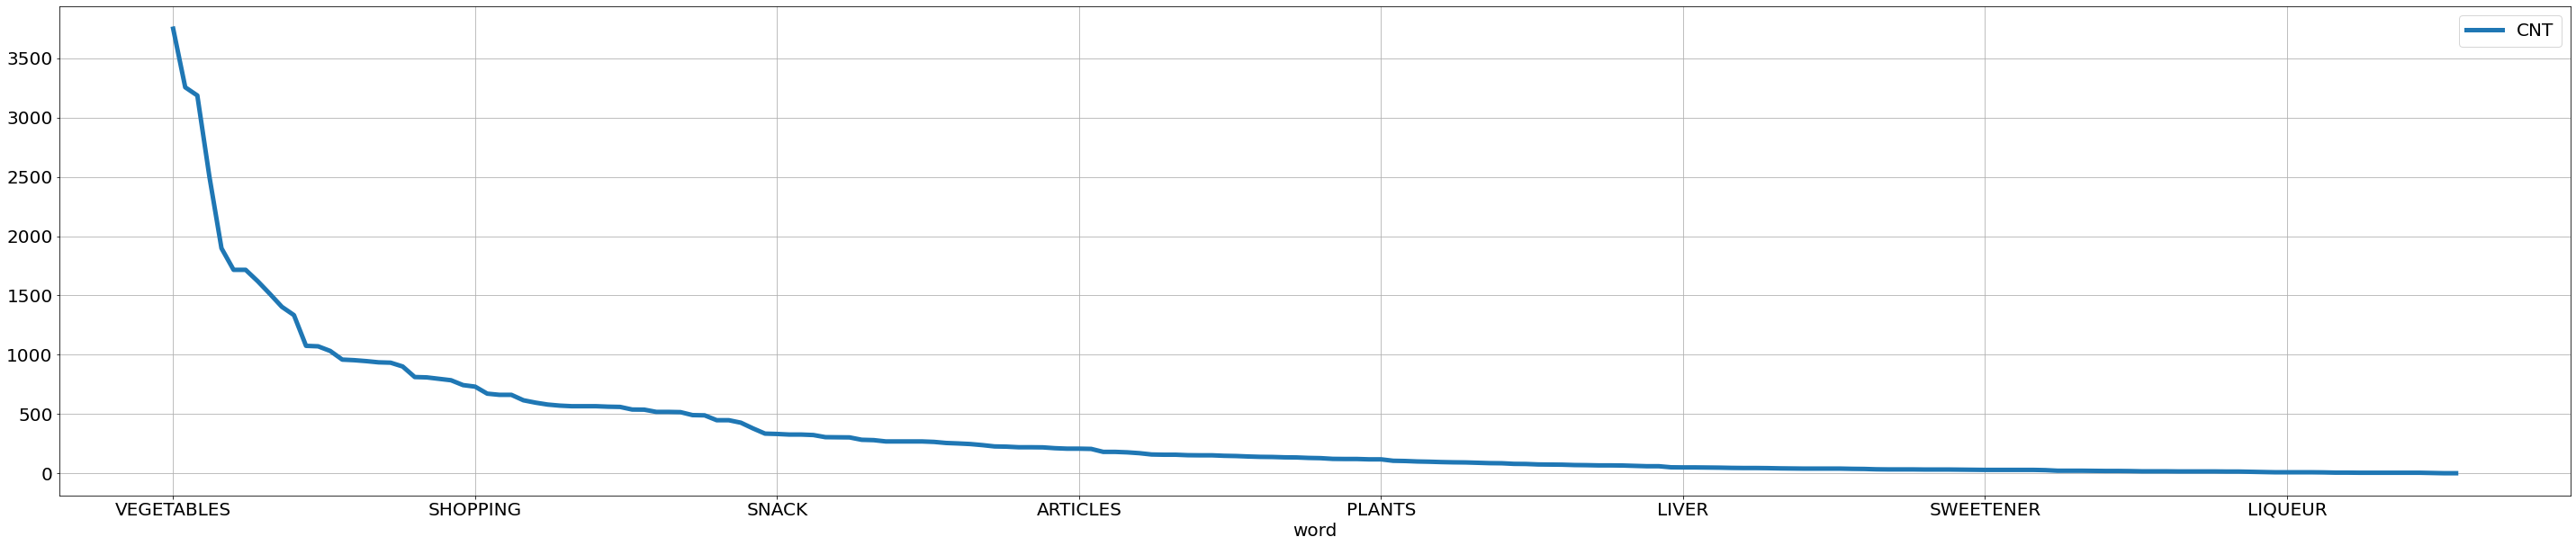

In [7]:
df_groupby = df_dict.groupby(['word']).agg( CNT=('constants', numpy.sum ))
df_groupby = df_groupby.sort_values(by='CNT', ascending=False)
display(df_groupby)
df_groupby.plot()